In [4]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *
from overlap_genes import get_best_genes_names

np.random.seed(1)
random.sedd(1)

# Baseline with preselected genes for CD8

In [7]:
#Load preprocess data
CD8 = np.array(pd.read_csv ('../data/processed_data/CD8csv_process.csv'))
y = np.array(CD8[:,-1],dtype=int)
CD8 = CD8[:,0:-1]

In [12]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8,y)

In [13]:
print(CD8.shape, len(pred))
acc = model.score_
print(acc)

(78, 6081) 78
0.46296296296296297


In [14]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.29069767441860467, 0.984264785675529, 0.46296296296296297, 0.9674666666666667, 0.5370370370370371, 0.7093023255813954)


# Filter methods

# Mutual information maximizer (MIR)

[  55   83   91  120  193  222  361  366  402  426  438  449  512  548
  683  686  770  823  826  836  864 1019 1090 1095 1200 1431 1436 1535
 1571 1617 1618 1646 1674 1840 1881 1895 1900 2143 2173 2180 2200 2333
 2339 2363 2606 2647 2671 2689 2757 2942 3017 3109 3151 3212 3277 3295
 3301 3618 3691 3733 3765 3768 3887 3919 4035 4053 4096 4142 4152 4177
 4319 4363 4436 4508 4516 4531 4725 4824 5010 5109 5153 5246 5272 5282
 5357 5467 5511 5519 5626 5754 5811 5911 5915 5917 5918 5941 5963 5979
 6022 6026] 0.8522727272727273


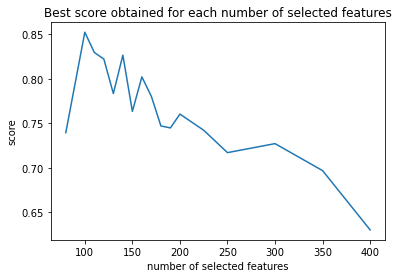

In [40]:
N = np.array([80,100,110,120,130,140,150,160,170,180,190,200,225,250,300,350,400])
best_subset, best_score = MIR(y, CD8, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [41]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

100
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8522727272727273, 0.9828722002635046, 0.8522727272727273, 0.9828722002635046, 0.14772727272727273, 0.14772727272727273)


[  55   83   98  120  193  215  222  286  361  366  402  426  432  438
  439  448  449  481  494  510  512  590  653  683  686  770  823  826
  836  911  974 1003 1019 1090 1095 1149 1185 1200 1251 1348 1431 1435
 1436 1535 1571 1572 1617 1618 1646 1674 1840 1881 1900 2003 2123 2143
 2150 2173 2180 2182 2200 2229 2333 2339 2363 2582 2647 2671 2689 2757
 2807 2827 2942 2978 3017 3100 3109 3128 3151 3291 3295 3301 3324 3339
 3474 3618 3691 3733 3765 3768 3887 3919 3927 4001 4035 4053 4096 4104
 4142 4152 4177 4227 4313 4319 4353 4363 4436 4531 4690 4725 4824 4898
 5010 5063 5109 5153 5155 5161 5189 5196 5246 5308 5406 5453 5497 5511
 5519 5523 5626 5727 5738 5756 5811 5842 5911 5915 5917 5918 5941 5963
 5979 6010 6026 6048 6050 6074] 0.9010989010989011


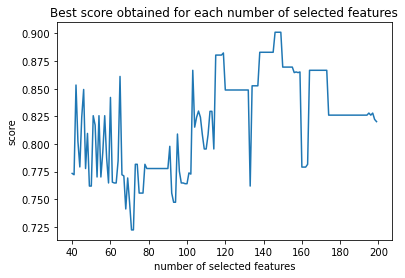

In [5]:
N = np.arange(40,200,1)
best_subset, best_score = MIR(y, CD8, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [6]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

146
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9010989010989011, 0.9799382716049383, 0.8631578947368421, 0.9860248447204969, 0.1368421052631579, 0.0989010989010989)


# Mutual information feature selection (MIFS)


[  38   42   45   51   53   56   60   64   82   86  111  116  122  141
  165  183  207  212  218  235  236  248  280  304  305  308  309  323
  328  349  359  364  370  413  423  428  449  458  482  515  520  528
  537  538  544  562  565  566  571  586  594  625  632  663  692  736
  742  747  765  771  789  796  827  842  843  853  869  875  882  895
  902  935  950  951 1001 1027 1037 1046 1052 1087 1092 1110 1128 1150
 1156 1162 1166 1194 1196 1205 1208 1232 1235 1241 1244 1253 1281 1288
 1301 1304 1314 1316 1319 1327 1370 1372 1380 1381 1384 1405 1433 1444
 1466 1494 1500 1510 1511 1517 1524 1525 1535 1540 1541 1581 1591 1594
 1600 1605 1607 1612 1613 1629 1640 1648 1652 1657 1669 1671 1672 1673
 1675 1686 1689 1691 1703 1709 1711 1712 1772 1777 1781 1794 1848 1857
 1864 1868 1877 1886 1901 1911 1921 1930 1935 1959 1979 1991 2003 2005
 2029 2035 2043 2062 2073 2080 2095 2100 2104 2117 2118 2121 2125 2129
 2138 2140 2144 2152 2172 2184 2201 2202 2234 2238 2241 2250 2270 2282
 2284 

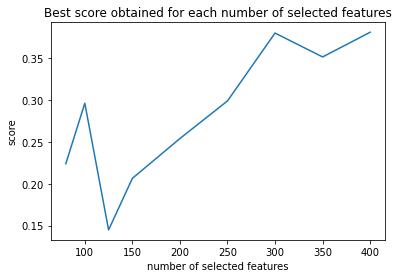

In [12]:
N = np.array([100,150,250,300,400])
best_subset, best_score = MIFS(y, CD8, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [13]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.38571428571428573, 0.968413496051687, 0.38028169014084506, 0.9691091954022989, 0.6197183098591549, 0.6142857142857143)


# Joint Mutual Information (JMI)

[   7   15  317  612  750  751  772  773  779  792  798  799  808  829
  840  891  893  927  945  957  980 1011 1053 1070 1109 1127 1201 1218
 1257 1259 1312 1333 1362 1454 1463 1493 1508 1546 1695 1771 1778 1780
 1783 1862 1903 1922 1928 1942 1945 2050 2053 2079 2082 2088 2161 2189
 2193 2212 2221 2227 2271 2311 2352 2398 2426 2474 2488 2515 2517 2520
 2522 2528 2537 2550 2589 2590 2605 2609 2636 2657 2664 2706 2747 2764
 2767 2794 2812 2816 2836 2867 2868 2877 2880 2881 2943 2962 2991 3002
 3029 3051 3053 3062 3069 3115 3129 3241 3253 3265 3269 3279 3300 3301
 3323 3346 3350 3364 3376 3391 3412 3443 3454 3549 3557 3558 3563 3566
 3580 3597 3614 3647 3658 3694 3746 3789 3815 3843 3844 3896 3906 3910
 3938 3943 3960 3963 3985 4014 4024 4133 4169 4173 4185 4194 4243 4246
 4253 4338 4347 4362 4421 4433 4441 4486 4508 4575 4580 4585 4586 4592
 4597 4598 4603 4623 4641 4645 4646 4649 4706 4749 4756 4784 4801 4810
 4821 4829 4832 4854 4868 4880 4923 4929 4947 4999 5002 5027 5055 5077
 5110 

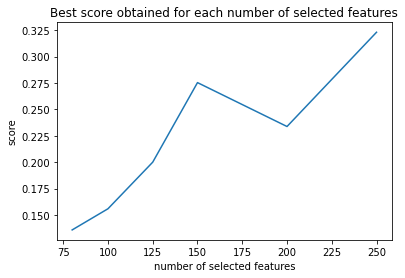

In [14]:
N = np.array([100,150,250])
best_subset, best_score = JMI(y, CD8, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [15]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

250
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3387096774193548, 0.9679533867443554, 0.3230769230769231, 0.9700729927007299, 0.676923076923077, 0.6612903225806451)


# Double input symmetrical relevance (DISR)

[   6    8   14   21   58   75   89  102  107  108  115  118  125  131
  134  143  147  204  211  227  238  239  247  261  262  265  269  284
  287  316  317  324  326  336  356  374  380  424  435  439  446  453
  454  474  475  490  539  551  561  569  570  576  582  583  588  589
  592  597  599  601  609  613  618  629  634  635  656  657  667  676
  685  690  694  702  719  721  722  725  728  731  734  750  751  772
  773  779  792  797  798  799  808  829  840  870  891  893  927  945
  957  980 1008 1011 1053 1056 1068 1070 1109 1127 1201 1218 1257 1259
 1312 1333 1334 1340 1362 1454 1463 1493 1495 1508 1546 1564 1575 1610
 1695 1732 1771 1778 1780 1801 1808 1823 1862 1906 1922 1928 1942 1945
 2014 2050 2079 2082 2088 2161 2189 2190 2193 2212 2221 2227 2271 2311
 2352 2363 2398 2426 2427 2474 2488 2515 2517 2520 2522 2537 2544 2550
 2571 2589 2590 2605 2609 2624 2636 2657 2664 2667 2695 2706 2747 2764
 2767 2775 2794 2806 2816 2836 2867 2868 2877 2880 2881 2896 2908 2918
 2935 

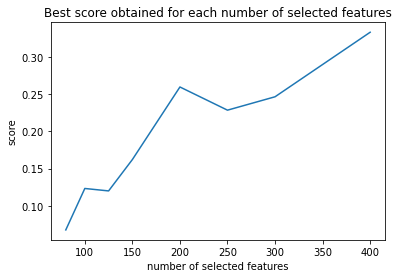

In [16]:
N = np.array([100,150,250,300,400])
best_subset, best_score = DISR(y, CD8, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [17]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3088235294117647, 0.972885732730794, 0.3333333333333333, 0.9697554697554698, 0.6666666666666666, 0.6911764705882353)


# Fisher's score

[   3   24   26   31   42   45   74   77   81   87   97  100  101  104
  114  120  121  125  128  141  146  157  177  190  191  192  198  204
  212  215  223  233  235  257  265  274  275  278  283  305  314  315
  320  335  338  345  346  348  351  364  366  371  374  415  420  423
  429  432  440  443  445  446  447  448  452  462  476  487  488  528
  542  547  550  559  561  562  565  576  579  597  605  613  622  627
  631  634  643  671  691  702  712  721  752  762  763  774  785  799
  806  807  808  810  857  868  872  875  882  889  911  926  940  941
  943  949  969  970  979  982  990 1012 1016 1019 1028 1033 1048 1052
 1057 1059 1085 1097 1102 1129 1145 1158 1177 1191 1205 1237 1249 1254
 1288 1298 1314 1316 1319 1336 1354 1356 1363 1372 1377 1396 1406 1407
 1417 1421 1430 1435 1440 1472 1493 1503 1506 1515 1522 1527 1532 1548
 1578 1610 1616 1637 1639 1641 1676 1684 1688 1715 1720 1728 1740 1747
 1748 1749 1754 1774 1776 1779 1792 1795 1798 1813 1815 1825 1826 1828
 1830 

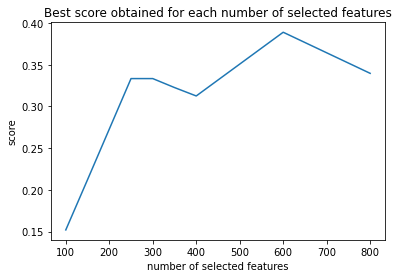

In [18]:
N = np.array([100,150,250,300,400,500,800])
best_subset, best_score = fishers_score(y, CD8, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [19]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.2441860465116279, 0.9811320754716981, 0.3888888888888889, 0.9635036496350365, 0.6111111111111112, 0.7558139534883721)


# Laplacian score

[   1   31   71  158  222  237  276  278  302  335  336  377  381  385
  434  467  504  513  524  589  595  601  614  655  656  671  702  726
  727  757  785  804  828  841  850  864  883  907  924  947  963  982
  999 1001 1003 1022 1034 1056 1057 1059 1062 1095 1106 1189 1231 1268
 1276 1279 1293 1330 1342 1346 1381 1388 1395 1399 1463 1465 1475 1486
 1502 1538 1553 1574 1582 1617 1657 1683 1705 1724 1727 1733 1744 1748
 1758 1791 1806 1814 1819 1925 1930 1954 1983 1999 2012 2096 2097 2106
 2107 2131 2207 2212 2253 2274 2302 2338 2339 2365 2369 2372 2373 2389
 2403 2413 2431 2460 2469 2477 2506 2535 2553 2557 2574 2575 2577 2578
 2592 2594 2600 2634 2656 2659 2698 2700 2703 2715 2739 2740 2746 2753
 2760 2784 2791 2795 2832 2868 2872 2886 2907 2910 2926 2931 2954 3003
 3004 3021 3025 3035 3059 3076 3082 3086 3105 3113 3114 3128 3152 3179
 3180 3191 3192 3199 3207 3228 3232 3281 3284 3296 3306 3307 3310 3335
 3349 3366 3382 3393 3397 3423 3430 3434 3435 3470 3471 3474 3482 3498
 3500 

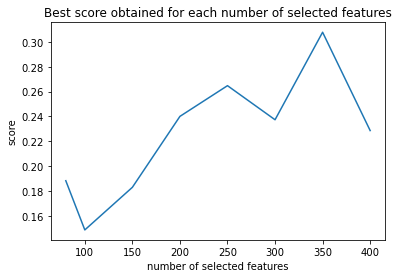

In [20]:
N = np.array([100,150,250,300,400])
best_subset, best_score = laplacian_score(y, CD8, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [21]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

350
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3333333333333333, 0.9663425579655947, 0.3076923076923077, 0.96996996996997, 0.6923076923076923, 0.6666666666666666)


# ReliefF algorithm

[  53   55  101  120  126  193  222  250  281  286  291  305  337  354
  361  366  374  380  389  402  420  438  445  481  494  499  504  512
  528  529  539  548  567  580  585  587  601  621  629  653  656  657
  665  694  755  770  799  888  903  909  910  980  999 1019 1038 1046
 1070 1095 1114 1151 1162 1179 1183 1230 1266 1279 1289 1320 1323 1344
 1382 1430 1431 1434 1435 1436 1461 1485 1487 1491 1517 1534 1535 1552
 1556 1571 1625 1628 1646 1671 1679 1731 1794 1802 1803 1840 1876 1881
 1907 1912 1913 1933 1977 1987 2034 2036 2044 2066 2074 2123 2141 2143
 2150 2181 2200 2229 2233 2268 2317 2390 2412 2436 2476 2497 2506 2511
 2577 2647 2668 2682 2689 2706 2748 2753 2757 2770 2792 2800 2807 2822
 2852 2931 2982 3150 3175 3185 3202 3277 3295 3301 3304 3309 3339 3353
 3390 3410 3428 3439 3477 3569 3571 3575 3588 3653 3661 3675 3682 3691
 3696 3732 3741 3751 3759 3769 3797 3807 3827 3868 3887 3900 3919 3932
 3980 4031 4042 4052 4071 4103 4106 4122 4135 4138 4142 4152 4155 4177
 4215 

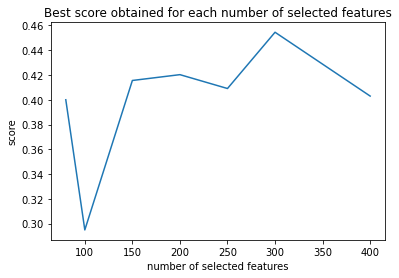

In [23]:
N = np.array([100,150,250,300,400])
best_subset, best_score = reliefF(y, CD8, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [24]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

300
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.39473684210526316, 0.9741750358680057, 0.45454545454545453, 0.9672364672364673, 0.5454545454545454, 0.6052631578947368)


# Fast Correlation Based Filter algorithm (FCBF)

[  34   77  113  117  133  143  160  162  168  170  180  184  266  268
  278  311  313  327  338  343  344  348  357  364  378  390  429  451
  456  460  472  476  499  503  521  528  567  573  591  601  612  617
  645  660  666  671  677  682  740  754  763  776  783  874  878  950
  978  983  985  987  989 1022 1037 1047 1054 1106 1110 1137 1146 1147
 1164 1183 1184 1189 1194 1200 1213 1220 1221 1226 1230 1233 1244 1252
 1256 1258 1268 1277 1288 1317 1326 1332 1368 1374 1384 1386 1393 1402
 1433 1435 1445 1455 1482 1489 1492 1497 1517 1549 1608 1623 1630 1635
 1642 1656 1662 1677 1703 1704 1711 1732 1746 1750 1764 1770 1786 1843
 1866 1882 1929 1942 1950 1954 1979 1998 1999 2009 2014 2045 2058 2063
 2084 2108 2125 2145 2149 2165 2166 2174 2190 2198 2206 2226 2243 2244
 2249 2259 2270 2274 2298 2308 2312 2317 2320 2321 2332 2350 2372 2393
 2405 2470 2475 2499 2504 2505 2528 2545 2559 2573 2576 2585 2590 2601
 2605 2633 2671 2696 2726 2785 2803 2815 2826 2863 2876 2891 2926 2929
 2931 

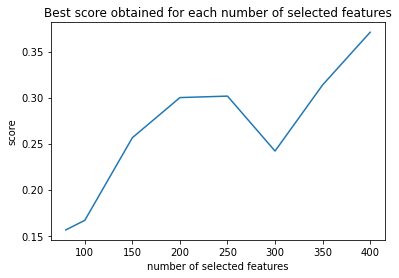

In [25]:
N = np.array([100,150,250,300,400,500,600,800,1000])
best_subset, best_score = FCBF(y, CD8, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [26]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3108108108108108, 0.9742063492063492, 0.3709677419354839, 0.9665354330708661, 0.6290322580645161, 0.6891891891891891)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


C:\Users\alexi\anaconda3\lib\site-packages\pyHSICLasso\api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 78. Number of blocks 3.9 will be approximated to 3.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
[  18   32   55   70   83  119  120  146  165  205  212  221  232  310
  426  454  498  512  529  536  542  545  617  621  660  668  692  731
  754  781  786  822  823  840  861  913 1036 1055 1089 1095 1117 1132
 1147 1154 1158 1162 1170 1177 

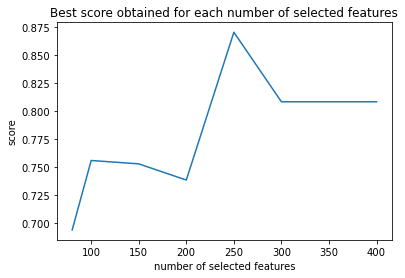

In [27]:
N = np.array([100,150,250,300,400,500,600,800,1000])
best_subset, best_score = HsicLasso(y, CD8, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [28]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

250
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.74, 0.9893719806763285, 0.8705882352941177, 0.9752380952380952, 0.12941176470588237, 0.26)


# Wrapper methods

# Stochastic optimization of features selection 

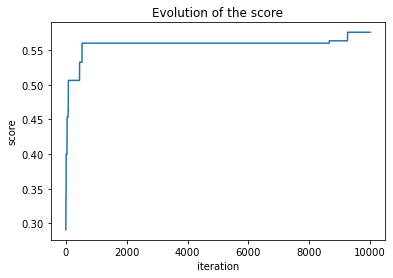

0.5757575757575758


In [42]:
best_subset, best_score  = hillclimbing(y, CD8, FamiliesClusters, compute_sensitivity,True, 10000, 0.1, True)
print(best_score)

In [43]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

3001
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5757575757575758, 0.9723849372384937, 0.5352112676056338, 0.9764705882352941, 0.4647887323943662, 0.42424242424242425)


# Stimulated annealing

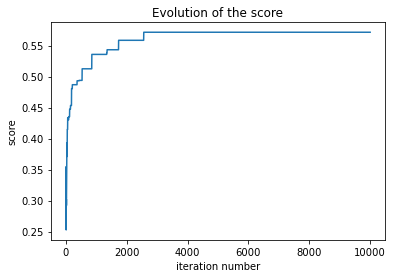

0.5714285714285714


In [44]:
best_subset, best_score  = stimulated_annealing(y, CD8, FamiliesClusters, compute_sensitivity,True, 10000, 0.1, 1, True)
print(best_score)

In [45]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

3064
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5714285714285714, 0.9789227166276346, 0.6197183098591549, 0.9743589743589743, 0.38028169014084506, 0.42857142857142855)


# Genetic feature selection algorithm

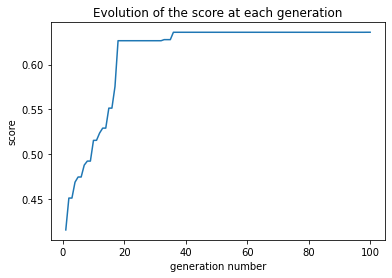

0.6362681912681912


In [51]:
best_subset, best_score  = genetic_fs(y,CD8,FamiliesClusters, compute_sensitivity,True, 300, 0.5, 0.2, 100, 3, True)
print(best_score)

In [52]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

857
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5789473684210527, 0.9541984732824428, 0.4074074074074074, 0.9765625, 0.5925925925925926, 0.42105263157894735)


# Hybrid methods

# Mutual information and stimulated annealing

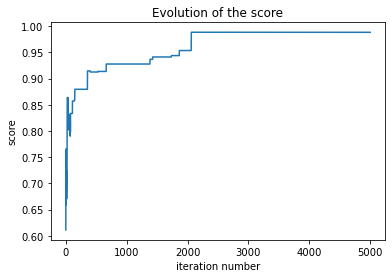

[  15   98  125  143  222  281  366  402  426  431  448  449  494  504
  512  513  540  548  551  560  585  590  656  686  714  739  764  769
  826  836  841  856  876  976 1050 1090 1116 1149 1266 1311 1348 1431
 1435 1483 1535 1549 1604 1617 1646 1786 1804 1837 1840 1881 1895 1898
 2003 2095 2143 2173 2180 2183 2200 2203 2233 2267 2284 2302 2318 2363
 2364 2373 2437 2466 2500 2536 2546 2562 2602 2606 2671 2717 2807 2822
 2862 2971 2973 3011 3043 3091 3100 3109 3151 3156 3189 3199 3277 3316
 3324 3370 3403 3471 3474 3488 3508 3618 3691 3700 3733 3765 3887 3892
 3981 4035 4152 4196 4215 4227 4319 4435 4461 4482 4508 4514 4516 4521
 4531 4574 4725 4729 4898 4998 5049 5063 5110 5153 5183 5228 5235 5246
 5249 5260 5272 5307 5308 5316 5329 5359 5384 5421 5462 5476 5487 5504
 5511 5519 5523 5574 5593 5634 5692 5727 5741 5742 5754 5796 5842 5857
 5876 5899 5911 5913 5915 5918 5941 5963 5969 6010 6021 6026 6050 6074] 0.9882352941176471


In [38]:
best_subset, best_score = MI_stimulated_annealing(y,CD8, FamiliesClusters, compute_sensitivity,True, np.array([400]), 3, 5000, 0.05, 1, True)
print(best_subset, best_score)

In [39]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

182
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9882352941176471, 0.9698581560283688, 0.8316831683168316, 0.9981751824817519, 0.16831683168316833, 0.011764705882352941)


# Mutual information and genetic feature selection

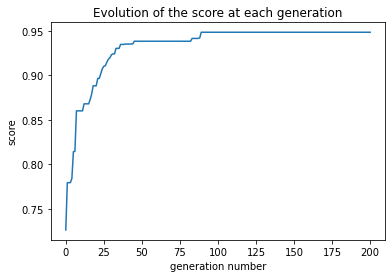

[  16   24   26   55   57   98  101  107  110  125  143  154  174  215
  222  250  292  310  319  346  361  405  426  438  447  449  488  500
  504  510  512  513  528  529  551  555  568  587  596  628  656  673
  693  694  712  739  764  783  818  823  827  834  836  837  911  918
  949  974  980 1004 1019 1042 1046 1055 1071 1074 1095 1116 1140 1162
 1197 1201 1237 1290 1344 1359 1361 1397 1421 1431 1434 1445 1470 1494
 1508 1571 1591 1595 1618 1636 1646 1657 1674 1738 1741 1754 1758 1762
 1786 1793 1802 1810 1827 1832 1837 1839 1848 1870 1898 1900 1933 1962
 1979 1987 2003 2018 2068 2083 2095 2141 2142 2148 2150 2173 2180 2190
 2218 2267 2274 2284 2302 2307 2318 2339 2341 2360 2364 2379 2386 2396
 2437 2461 2468 2502 2511 2520 2534 2546 2551 2562 2563 2568 2602 2606
 2647 2671 2677 2689 2694 2717 2739 2796 2831 2852 2862 2903 2910 2921
 2934 2942 2962 2978 2985 3012 3017 3033 3080 3100 3109 3128 3138 3151
 3187 3189 3194 3199 3228 3264 3267 3270 3291 3295 3301 3309 3324 3339
 3341 

In [53]:
best_subset_CD8, best_score = MI_genetic_fs(y,CD8, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  300, 0.5, 0.2, 200, 3, True)
print(best_subset_CD8, best_score)

In [54]:
print(len(best_subset_CD8))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(CD8[:, best_subset_CD8],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

335
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9468085106382979, 0.9841017488076311, 0.898989898989899, 0.9919871794871795, 0.10101010101010101, 0.05319148936170213)


# Best method = MI/GA

In [15]:
#Create .csv with names of this subset
get_best_genes_names(best_subset_CD8, '../data/processed_data/CD8genes_interest.csv', '../data/optimized_subsets/CD8genes_best.csv')